In [23]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### 1- Modellierungen

In [24]:
mean_league_team = pd.read_csv("mean_league_teamv1.csv")
mean_league_team.head(10)

,year,team_placement,age,height,weight
0,2003,1,40.515152,1.831212,74.848485
1,2003,2,43.129032,1.815806,76.709677
2,2003,3,40.000000,1.813590,78.256410
3,2003,4,40.605263,1.828684,75.540541
4,2003,5,41.000000,1.799615,74.000000
5,2003,6,40.607143,1.825926,75.037037
6,2003,7,42.968750,1.805937,75.656250
7,2003,8,42.666667,1.821053,77.631579
8,2003,9,41.909091,1.816061,76.666667
9,2003,10,42.769231,1.820769,76.076923


### 2- Train und Valiedirung

- year wird raus genommen wegen die Multikollinearität mit und age

In [25]:
X = mean_league_team.drop(columns=['year','team_placement'])
y = mean_league_team.team_placement

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
print("QTD LINHAS: ", len(X_train))
X.head()

QTD LINHAS:  254


,age,height,weight
0,40.515152,1.831212,74.848485
1,43.129032,1.815806,76.709677
2,40.000000,1.813590,78.256410
3,40.605263,1.828684,75.540541
4,41.000000,1.799615,74.000000


###  3- Base nomarlizierung
- die Spalten age, height, weight werden in der gleiche Skala normalizirt.

<AxesSubplot:>

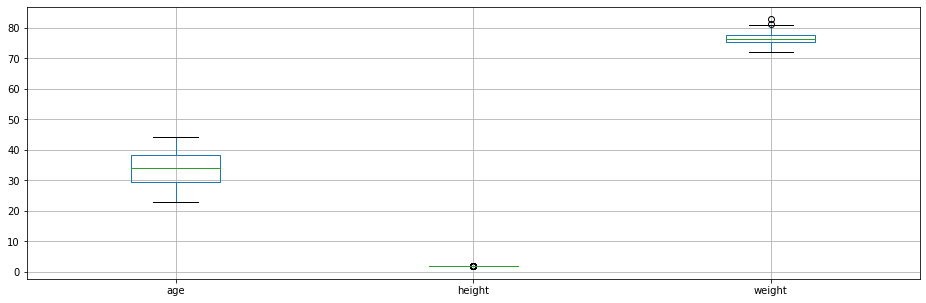

In [27]:
mean_league_team.drop(columns=['team_placement','year']).boxplot(figsize=(16,5))

In [28]:
scaler = MinMaxScaler()
X_treino_scaler = scaler.fit_transform(X_train)
X_teste_scaler = scaler.transform(X_valid)
X_teste_scaler[:5]

array([[0.36817102, 0.59025927, 0.29791219],
       [0.23193625, 0.58189161, 0.42245266],
       [0.28352408, 0.7011449 , 0.23782687],
       [0.88507755, 0.67429125, 0.37781785],
       [0.90087703, 0.38332929, 0.23964764]])

In [29]:
## daten normalisiert  dataframe
pd.DataFrame(X_teste_scaler,columns=X.columns).head()

,age,height,weight
0,0.368171,0.590259,0.297912
1,0.231936,0.581892,0.422453
2,0.283524,0.701145,0.237827
3,0.885078,0.674291,0.377818
4,0.900877,0.383329,0.239648


## Logistik Regression

In [33]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [34]:
LR.score(X_valid,y_valid)

0.015873015873015872

## Modelltraining mit den normalisierten Daten

In [35]:
LR_scaler = LogisticRegression(random_state=0)
LR_scaler.fit(X_treino_scaler, y_train)
LR_scaler.score(X_teste_scaler, y_valid)

0.015873015873015872

## DecisionTreeClassifier

In [36]:
DT = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

DT.score(X_teste, y_teste)

0.03968253968253968

In [37]:
DT_scaler = DecisionTreeClassifier(random_state=0).fit(X_treino_scaler, y_train)
DT_scaler.score(X_teste_scaler, y_valid)

0.03968253968253968

## 4- Die Zwischen Ergbnisse sind unzufrieden
-  Die Daten müssen remodeliert werden.
-  Es gibt 20 Zielvariable für eine Kleine Base von Training Daten
-  Die Zielvariablen mussen grupiert werden.